Loaded and processed players_15.csv
Loaded and processed players_16.csv
Loaded and processed players_17.csv
Loaded and processed players_18.csv
Loaded and processed players_19.csv
Loaded and processed players_20.csv
Loaded and processed players_21.csv
Data loading and preprocessing complete.
Shape of training sequences (X_train): (98232, 50, 1)
Shape of training targets (y_train): (98232, 1)
Shape of testing sequences (X_test): (24559, 50, 1)
Shape of testing targets (y_test): (24559, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0024 - val_loss: 5.1956e-05
Epoch 2/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 7.7145e-05 - val_loss: 9.6822e-05
Epoch 3/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 3.8462e-05 - val_loss: 5.0310e-07
Epoch 4/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 4.2362e-05 - val_loss: 6.9155e-06
Epoch 5/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 9.1279e-05 - val_loss: 1.0467e-06
Epoch 6/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 4.5044e-05 - val_loss: 7.7971e-07
Epoch 7/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 7.5957e-05 - val_loss: 1.2558e-06
Epoch 8/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - loss: 4.6347e-05 - val_loss: 4.6231e-06
Epoch 9/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 7.0430e-05 - val_loss: 1.0068e-06
Epoch 10/100
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 5.9920e-05 - val_loss: 4.4331e-07
Epoch 11/100


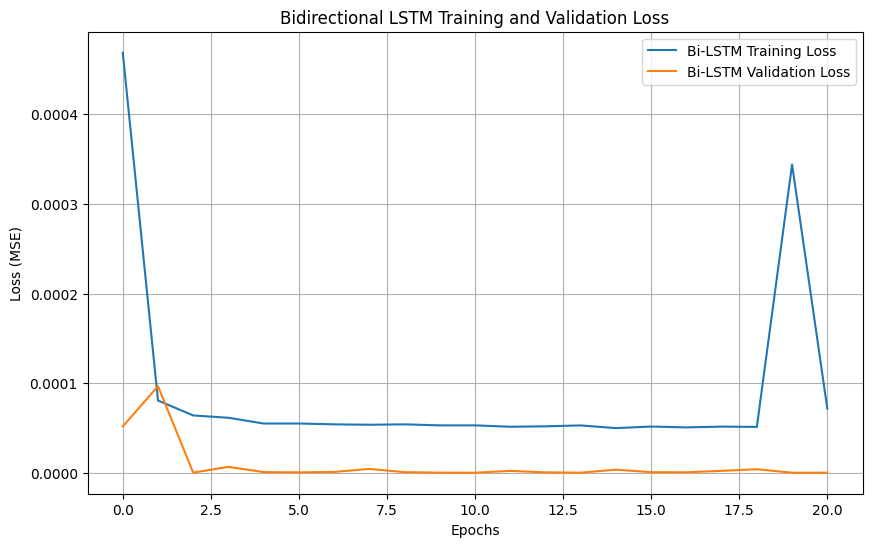

Good sign: Bi-LSTM Minimum validation loss is lower than minimum training loss.


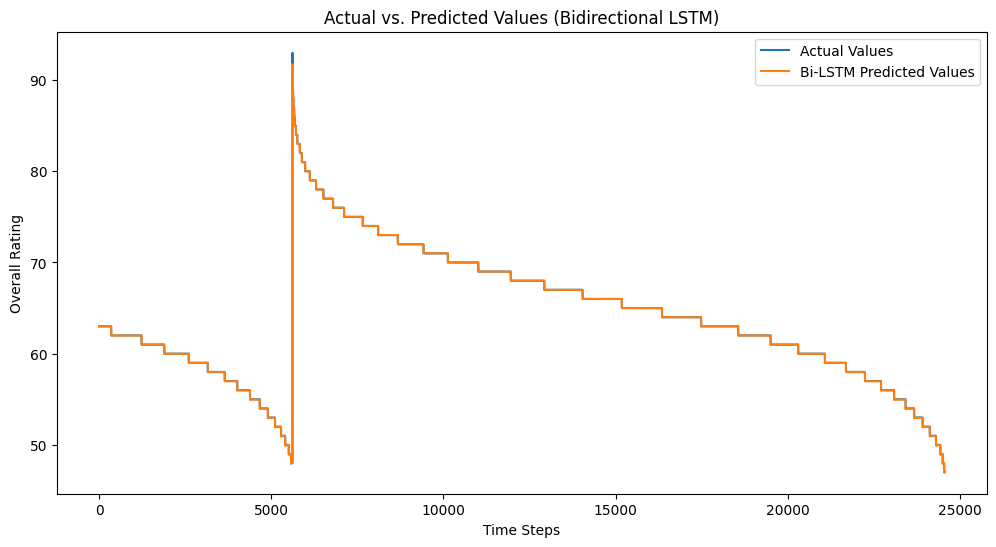

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


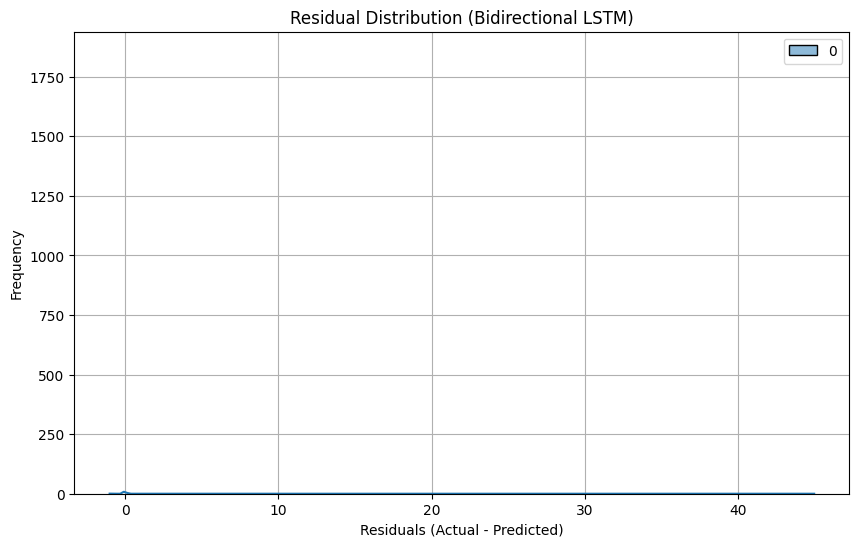

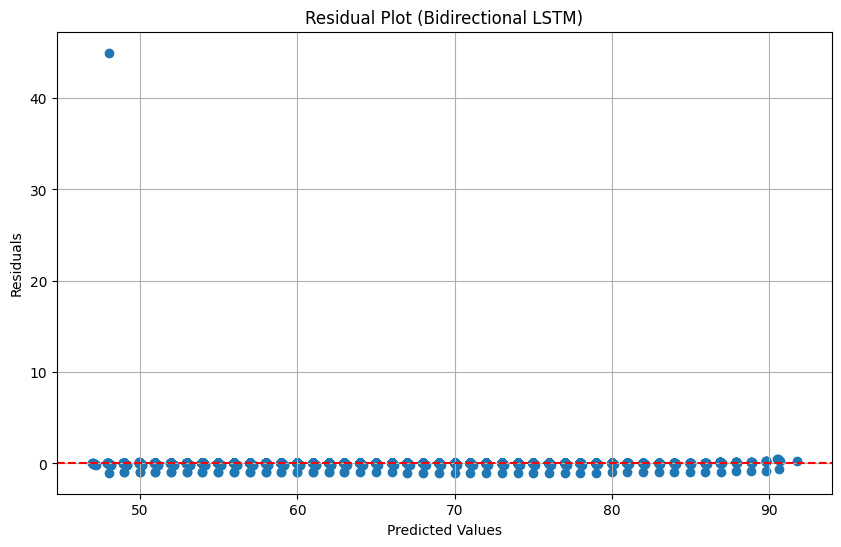

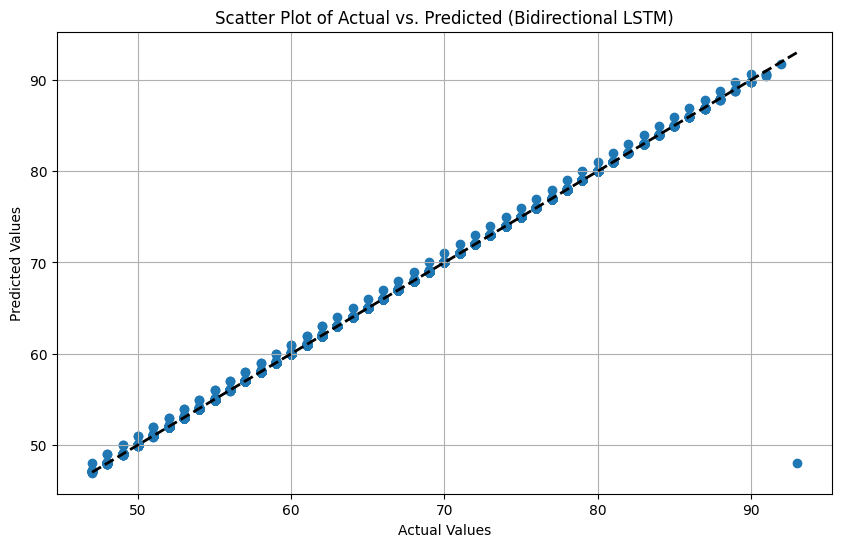

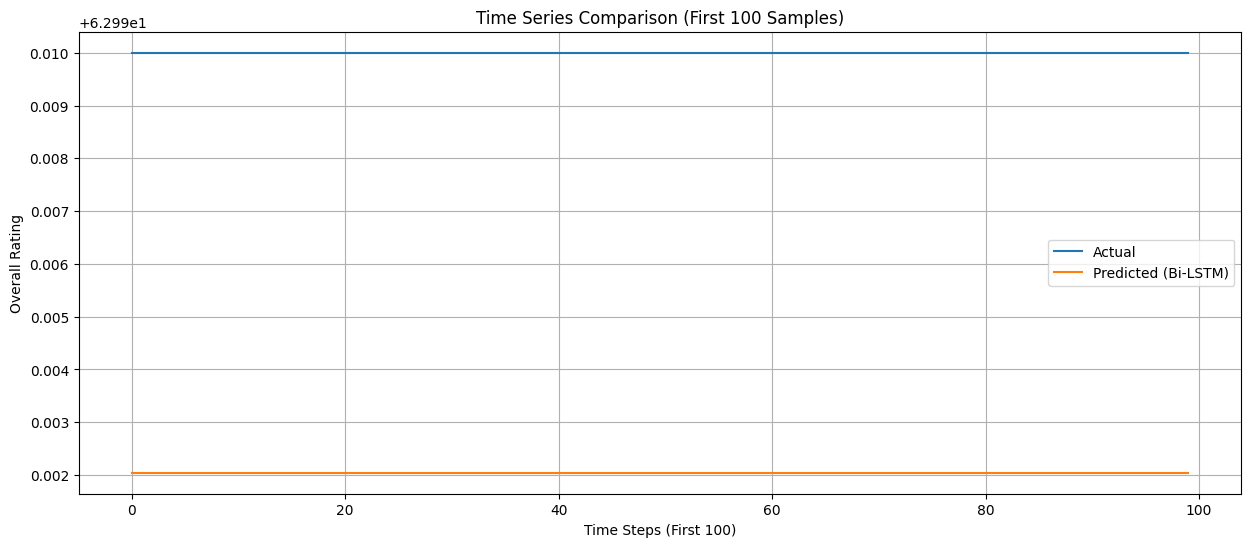

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import os
from google.colab import files
import seaborn as sns
from sklearn.metrics import confusion_matrix  # For classification if you adapt the problem

# --- Step 2: Load and Preprocess the Data from Google Colab ---
all_data = []
for i in range(15, 22):
    file_name = f"players_{i}.csv"
    try:
        df = pd.read_csv(file_name)
        data = df[['overall']].values
        all_data.append(data)
        print(f"Loaded and processed {file_name}")
    except FileNotFoundError:
        print(f"Error: File not found: {file_name}. Make sure you have uploaded it.")
all_data = np.concatenate(all_data, axis=0)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(all_data)
print("Data loading and preprocessing complete.")

# --- Step 3: Prepare Data for Bidirectional LSTM ---
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(f"Shape of training sequences (X_train): {X_train.shape}")
print(f"Shape of training targets (y_train): {y_train.shape}")
print(f"Shape of testing sequences (X_test): {X_test.shape}")
print(f"Shape of testing targets (y_test): {y_test.shape}")

# --- Step 4: Build the Bidirectional LSTM Model ---
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model_bilstm.add(Bidirectional(LSTM(units=50)))
model_bilstm.add(Dense(units=1))
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')
model_bilstm.summary()

# --- Step 5: Train the Bidirectional LSTM Model with Early Stopping ---
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=100, batch_size=32,
                                  validation_split=0.1, verbose=1, callbacks=[early_stopping_bilstm])
print("Bidirectional LSTM model training with Early Stopping complete.")

# --- Step 6: Evaluate the Bidirectional LSTM Model ---
predicted_scaled_bilstm = model_bilstm.predict(X_test)
predicted_bilstm = scaler.inverse_transform(predicted_scaled_bilstm)
actual_bilstm = scaler.inverse_transform(y_test)

mse_bilstm = mean_squared_error(actual_bilstm, predicted_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)
mae_bilstm = mean_absolute_error(actual_bilstm, predicted_bilstm)
r2_bilstm = r2_score(actual_bilstm, predicted_bilstm)

print("\n--- Bidirectional LSTM Model Evaluation ---")
print(f'Mean Squared Error (MSE): {mse_bilstm:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_bilstm:.4f}')
print(f'Mean Absolute Error (MAE): {mae_bilstm:.4f}')
print(f'R-squared (R²): {r2_bilstm:.4f}')

# --- Step 7: Visualize Training and Validation Loss for Bidirectional LSTM ---
plt.figure(figsize=(10, 6))
plt.plot(history_bilstm.history['loss'], label='Bi-LSTM Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Bi-LSTM Validation Loss')
plt.title('Bidirectional LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

if history_bilstm.history['val_loss'][-1] > history_bilstm.history['loss'][-1]:
    print("Warning: Bi-LSTM Validation loss is higher than training loss in the last epoch, which could indicate overfitting.")
elif min(history_bilstm.history['val_loss']) < min(history_bilstm.history['loss']):
    print("Good sign: Bi-LSTM Minimum validation loss is lower than minimum training loss.")
else:
    print("Bi-LSTM Validation and training loss are relatively close.")

# --- Step 8: Visualize Actual vs. Predicted Values for Bidirectional LSTM ---
plt.figure(figsize=(12, 6))
plt.plot(actual_bilstm, label='Actual Values')
plt.plot(predicted_bilstm, label='Bi-LSTM Predicted Values')
plt.title('Actual vs. Predicted Values (Bidirectional LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('Overall Rating')
plt.legend()
plt.show()

# --- Step 9: Residual Analysis (Error Distribution) ---
residuals_bilstm = actual_bilstm - predicted_bilstm
plt.figure(figsize=(10, 6))
sns.histplot(residuals_bilstm, kde=True)
plt.title('Residual Distribution (Bidirectional LSTM)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(predicted_bilstm, residuals_bilstm)
plt.title('Residual Plot (Bidirectional LSTM)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# --- Step 10: Scatter Plot of Actual vs. Predicted Values ---
plt.figure(figsize=(10, 6))
plt.scatter(actual_bilstm, predicted_bilstm)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted (Bidirectional LSTM)')
plt.plot([actual_bilstm.min(), actual_bilstm.max()], [actual_bilstm.min(), actual_bilstm.max()], 'k--', lw=2) # Ideal prediction line
plt.grid(True)
plt.show()

# --- Step 11: Time Series Plot of a Subset (First 100 Samples) ---
n_samples = min(100, len(actual_bilstm))
plt.figure(figsize=(15, 6))
plt.plot(range(n_samples), actual_bilstm[:n_samples], label='Actual')
plt.plot(range(n_samples), predicted_bilstm[:n_samples], label='Predicted (Bi-LSTM)')
plt.xlabel('Time Steps (First 100)')
plt.ylabel('Overall Rating')
plt.title('Time Series Comparison (First 100 Samples)')
plt.legend()
plt.grid(True)
plt.show()

# --- Step 12: If you were doing classification (adapt if needed) ---
# If you had a classification task, you could calculate accuracy and the confusion matrix.
# Since this is regression, these are not directly applicable to the 'overall' rating.
# If you had a thresholded prediction (e.g., predicting if a rating will increase/decrease),
# you could adapt the 'y_test' and 'predicted_bilstm' accordingly and then use:
#
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#
# # Example (adapt your problem accordingly):
# threshold = 0.5 # Example threshold
# predicted_classes = (predicted_bilstm > threshold).astype(int)
# actual_classes = (y_test > threshold).astype(int) # Assuming y_test was also thresholded
#
# accuracy = accuracy_score(actual_classes, predicted_classes)
# conf_matrix = confusion_matrix(actual_classes, predicted_classes)
# class_report = classification_report(actual_classes, predicted_classes)
#
# print("\n--- Classification Metrics (Adapt if your task was classification) ---")
# print(f'Accuracy: {accuracy:.4f}')
# print('\nConfusion Matrix:\n', conf_matrix)
# print('\nClassification Report:\n', class_report)
#
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Confusion Matrix')
# plt.show()